<a href="https://colab.research.google.com/github/GDurgaGowri/Predictions_ML/blob/main/txtclsrnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 155s 951ms/step - accuracy: 0.5052 - loss: 0.7122 - val_accuracy: 0.5418 - val_loss: 0.6871
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 123ms/step


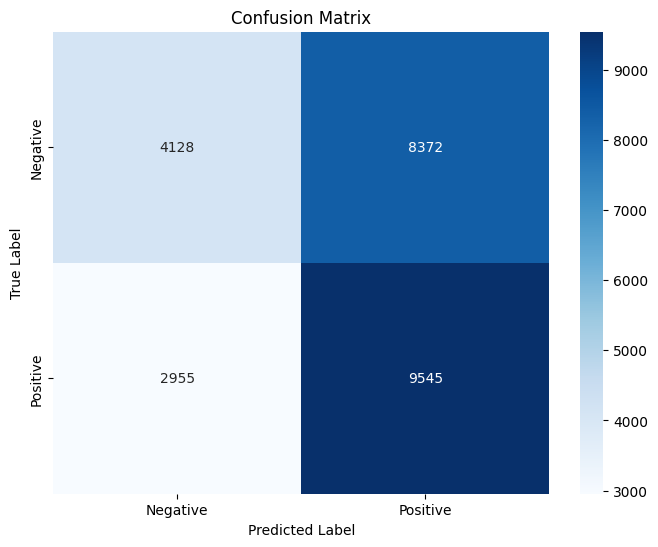

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import imdb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import sequence

# Load data
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=1000)

# Preprocess data
max_words = 500
train_x = sequence.pad_sequences(train_x, maxlen=max_words)
test_x = sequence.pad_sequences(test_x, maxlen=max_words)

# Convert to NumPy arrays if they are not already
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

# Define model
embedding_size = 32
model = Sequential()
model.add(Embedding(1000, embedding_size, input_length=max_words))
model.add(SimpleRNN(100, return_sequences=True))
model.add(SimpleRNN(50, return_sequences=True))
model.add(SimpleRNN(25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train model with 1 epoch
history = model.fit(train_x, train_y, epochs=1, batch_size=128, validation_split=0.2)

# Create TensorFlow Dataset for test data
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).batch(128)

# Make predictions
y_pred_probs = model.predict(test_x)  # Directly use test_x for prediction
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Compute additional metrics
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)
accuracy = accuracy_score(test_y, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.54692
Precision: 0.5327342747111682
Recall: 0.7636
F1-Score: 0.6276095604431732


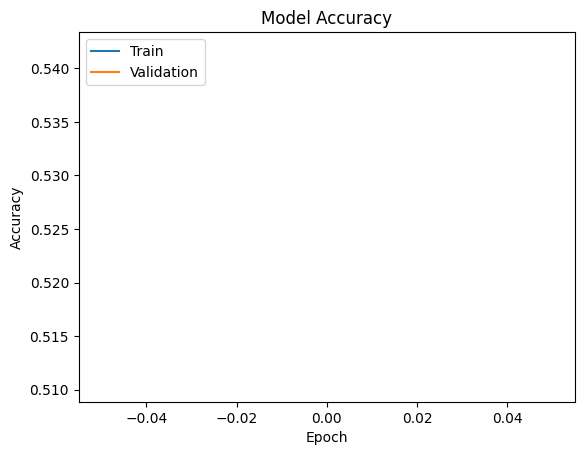

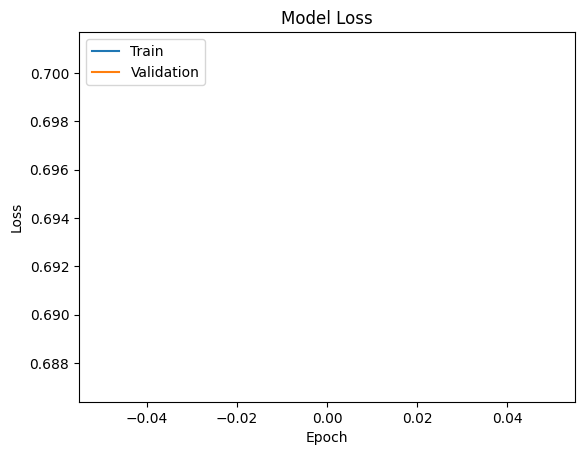

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [49]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_x, train_y, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 136s 837ms/step - accuracy: 0.5580 - loss: 0.6770 - val_accuracy: 0.5748 - val_loss: 0.6634
Epoch 2/5
 41/157 ━━━━━━━━━━━━━━━━━━━━ 1:30 779ms/step - accuracy: 0.6072 - loss: 0.6546

In [ ]:
print(history.history)
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_x, test_y)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = (model.predict(test_x) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

print('Confusion Matrix:')
print(cm)


782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step
Confusion Matrix:
[[4128 8372]
 [2955 9545]]


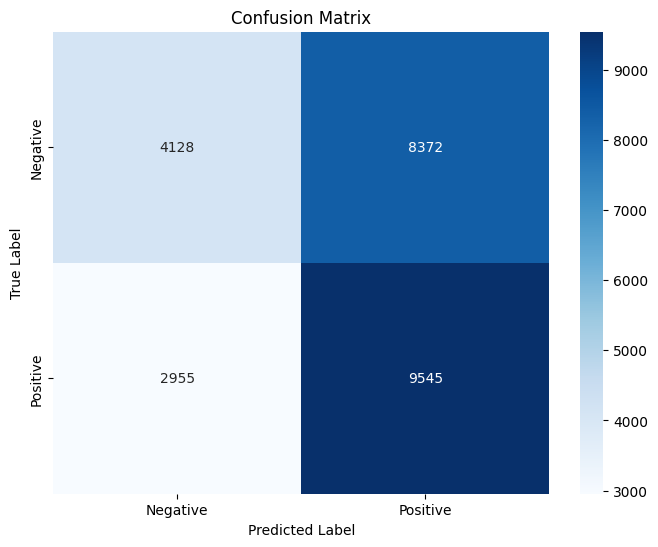

In [46]:

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
